# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 4. Доверительные интервалы
### Дедлайн --- 29 ноября 9:00

Мы предлагаем выполнять задания прямо в этом ноутбуке. **Пожалуйста, не стирайте условия задач и не переименовывайте ноутбук!**

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 10 баллов**.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

from tqdm.notebook import tqdm
from typing import Callable

sns.set(font_scale=1.4, style='whitegrid', palette='Set2')

## Задача 1

Сгенерируйте выборку $X_1, ...,X_{100}$ из распределения $P_\theta$.

Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$
изобразите на графиках в координатах $(n, \theta)$
* Доверительный интервал оценки $\widehat{\theta}$
* График оценки $\widehat{\theta}$
* Точки выборки

Для отрисовки доверительного интервала используйте `plt.fill_between`. Не забывайте про параметр `alpha`.

Для того, чтобы избежать дублирования кода, рекомендуем написать функцию `draw_confidence_interval`, изображающую на графике все необходимое.

In [171]:
# YOUR CODE GOES HERE
def draw_confidence_interval(title,
                             distr,
                             theta,
                             estimation_func, 
                             get_confidence_interval,
                             figure_size=(16, 9),
                             ylim=None,
                             alpha=0.95, 
                             n=100):
    sample = distr.rvs(size=n)
    estimations = estimation_func.accumulate(sample, theta)
    confidence_interval = get_confidence_interval(estimations, alpha)
    
    plt.figure(figsize=figure_size)
    
    plt.scatter(
        np.arange(n),
        sample,
        label='Sample'
    )
    plt.plot(
        np.arange(n),
        estimations,
        label='$\hat{\\theta}$'
    )
    plt.fill_between(
        np.arange(n),
        *confidence_interval,
        alpha=0.2,
        label='Confidence interval'
    )
    
    plt.title(title)
    plt.legend()
    
    if not ylim == None:
        plt.ylim(*ylim)
    

Выполните задание для следующих $P_\theta$ и $\widehat{\theta}$ (формулы доверительных итервалов были получены на семинарах):

### 1. Равномерное распределение, $\theta = 10$, оценка $\widehat{\theta} = X_{(n)}$

In [172]:
def get_confidence_interval_uni(estimations, theta, alpha=0.95):
#     n = np.arange(1, len(estimations) + 1)
#     return np.array([
#         estimations * (n + 1) / (n + np.sqrt(n / (1 - alpha) / (n + 2))),
#         estimations * (n + 1) / (n - np.sqrt(n / (1 - alpha) / (n + 2)))
#     ])
    n = np.arange(1, estimations.size + 1)
    return np.array([estimations / ((1 + alpha) / 2) ** (1 / n),
    estimations / ((1 - alpha) / 2) ** (1 / n)])


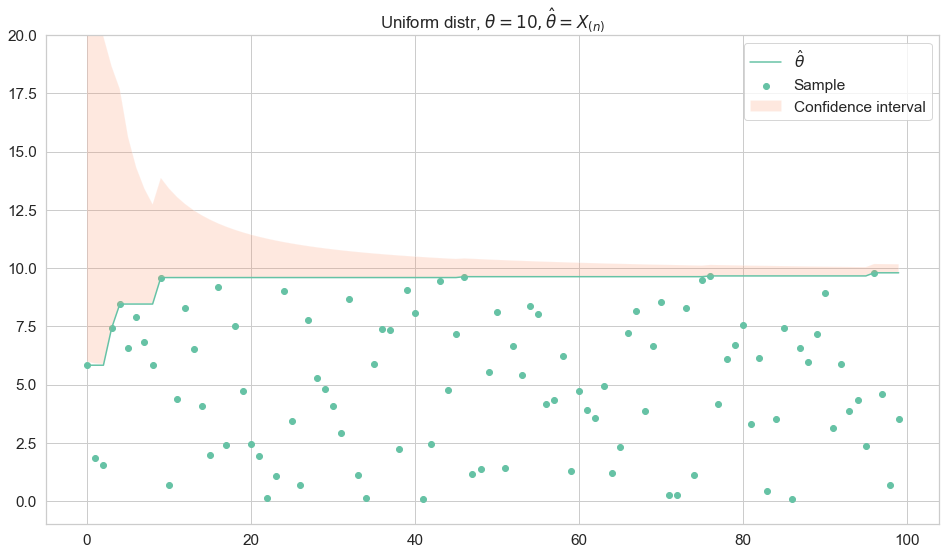

In [164]:
# YOUR CODE GOES HERE


draw_confidence_interval(
    'Uniform distr, $\\theta = 10, \hat{\\theta} = X_{(n)}$',
    sps.uniform(scale=10),
    10,
    np.maximum,
    get_confidence_interval_uni,
    ylim=(-1, 20)
)

### 2. Распределение Коши, $\theta = 10$, оценка — медиана

In [165]:
# YOUR CODE GOES HERE

def get_confidence_interval_cauchy(estimations, alpha=0.95):
    n = np.arange(1, estimations.size + 1)
    diff = [np.pi / 2 / np.sqrt(n) * sps.norm.ppf((1 + alpha) / 2),
    np.pi / 2 / np.sqrt(n) * sps.norm.ppf((1 - alpha) / 2)]
    return np.array([estimations - diff[0], estimations - diff[1]])


class Median:
    def accumulate(self, sample):
        return np.array([np.median(sample[:i]) for i in range(1, len(sample) + 1)])

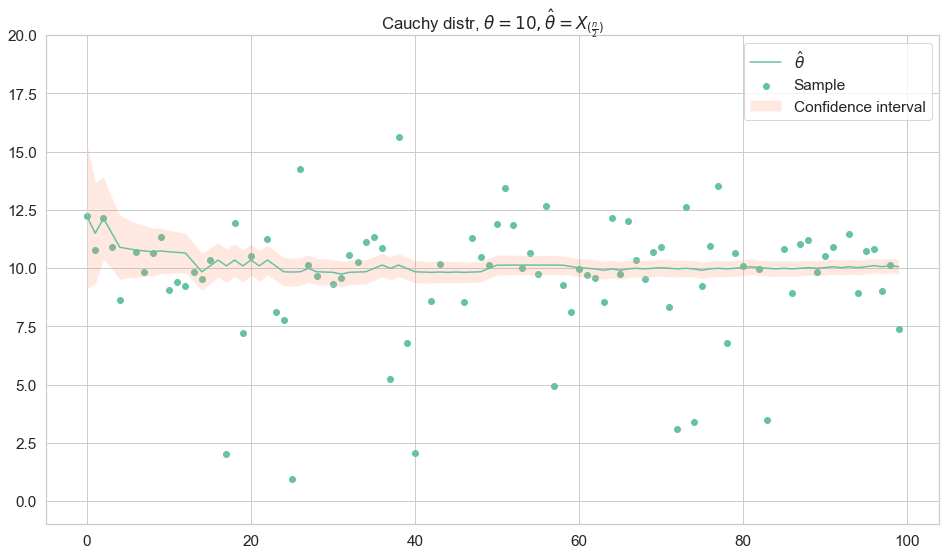

In [166]:
draw_confidence_interval(
    'Cauchy distr, $\\theta = 10, \hat{\\theta} = X_{(\\frac{n}{2})}$',
    sps.cauchy(loc=10),
    Median(),
    get_confidence_interval_cauchy,
    ylim=(-1, 20)
)

### 3. Распределение Пуассона, $\theta = 10$, оценка $\widehat{\theta} = \overline{X}$

In [167]:
# YOUR CODE GOES HERE

def get_confidence_interval_poiss(estimations, alpha=0.95):
    n = np.arange(1, estimations.size + 1)
    diff = [np.sqrt(estimations / n) * sps.norm.ppf((1 + alpha) / 2),
    np.sqrt(estimations / n) * sps.norm.ppf((1 - alpha) / 2)]
    return np.array([estimations - diff[0], estimations - diff[1]])

class Mean:
    def accumulate(self, sample):
        return np.array([np.mean(sample[:i]) for i in range(1, len(sample) + 1)])

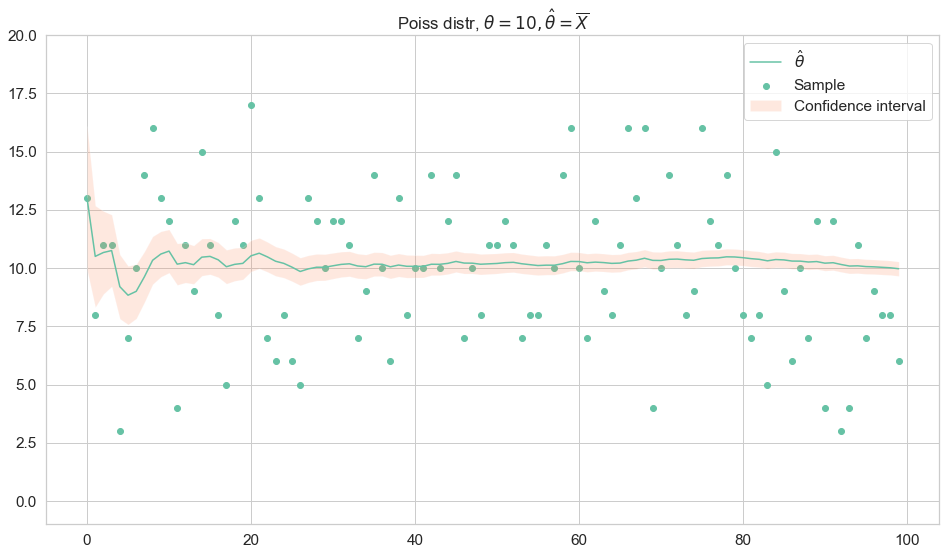

In [170]:
draw_confidence_interval(
    'Poiss distr, $\\theta =10, \hat{\\theta} = \\overline{X}$',
    sps.poisson(10),
    Mean(),
    get_confidence_interval_cauchy,
    ylim=(-1, 20)
)

### 4. Гамма-распределение, $(\theta, \lambda) = (10, 3)$, $\lambda$ известна

In [6]:
# YOUR CODE GOES HERE

def get_confidence_interval_gamma(estimations, alpha=0.95):
    n = np.arange(1, estimations.size + 1)
    diff = [np.sqrt(estimations / n) * sps.norm.ppf((1 + alpha) / 2),
    np.sqrt(estimations / n) * sps.norm.ppf((1 - alpha) / 2)]
    return np.array([estimations - diff[0], estimations - diff[1]])

class Mean:
    def accumulate(self, sample):
        return np.array([np.mean(sample[:i]) for i in range(1, len(sample) + 1)])

In [ ]:
draw_confidence_interval(
    'Poiss distr, $\\theta =10, \hat{\\theta} = \\overline{X}$',
    sps.poisson(10),
    Mean(),
    get_confidence_interval_gamma,
    ylim=(-1, 20)
)

Сделайте выводы о размерах и форме доверительных интервалов для каждого случая.

# Задача 2

Для $n = 100$ оцените для кажого пункта предыдущей задачи вероятность попадания истинного значения
$\theta$ в интервал. Для этого нужно сделать слудующее:
1. Сгенерируйте достаточно много выборок из $P_{\theta}$
2. Постройте по каждой из них интервалы для $\widehat{\theta}$
3. Определите, сколько раз истинное значение $\theta.$ попадает в построенные интервалы. Таким способом будет
построена бернуллиевская выборка, по ней оцените вероятность.

Предположите, какое количество выборок нужно взять. Обоснуйте свой выбор.

__Ответ:__

In [7]:
# YOUR CODE GOES HERE

### Равномерное распределение

In [8]:
# YOUR CODE GOES HERE

### Распределение Коши

In [9]:
# YOUR CODE GOES HERE

### Распределение Пуассона

In [10]:
# YOUR CODE GOES HERE

### Гамма-распределение

In [11]:
# YOUR CODE GOES HERE

Сделайте выводы.

# Задача 3

В этой задаче мы построим точный и асимптотический доверительный интевалы для нормального распределения и сравним их.

Пусть $X_1, \dots, X_n$ — выборка из нормального распределения со средним $a$ и дисперсией $\sigma^2$, причем $\sigma$ неизвестна. Выпишите формулы

* точного доверительного итервала уровня доверия $\alpha$ для $a$:

* асимптотического доверительного итервала уровня доверия $\alpha$ для $a$


Для $n=30, \,a = 0$ постройте __на одном графике__ точный и асимптотический доверительный интервал, а также отметьте линией истинное значение $a$

In [12]:
def calculate_conf_interval(
    sample: np.ndarray, 
    alpha: float = 0.95
):
    """Вычисление точного доверительного интервала уровня доверия alpha. """
    # YOUR CODE GOES HERE
    pass

In [13]:
def calculate_asymptotic_conf_interval(
    sample: np.ndatrray, 
    alpha: float = 0.95
):
    """Вычисление асимптотического доверительного интервала уровня доверия alpha. """
    # YOUR CODE GOES HERE
    pass

AttributeError: module 'numpy' has no attribute 'ndatrray'

In [ ]:
# YOUR CODE GOES HERE

Сделайте выводы. В каких случаях уместно использовать асимптотический интервал вместо точного?

# Задача 4

В этой задаче мы проанализируем изменение индекса качества воздуха (air quality index, AQI) для двух мегаполисов Индии за последние годы. Данные взяты с Kaggle (https://www.kaggle.com/rohanrao/air-quality-data-in-india)

In [14]:
!gdown https://drive.google.com/uc?id=1Y_mE_jlEF82UDf41l1LFMDHX_LHvF2SC 

Downloading...
From: https://drive.google.com/uc?id=1Y_mE_jlEF82UDf41l1LFMDHX_LHvF2SC
To: /Users/avborovets/Desktop/PROGA/Statistics/Statistics/city_day.csv
100%|██████████████████████████████████████| 2.57M/2.57M [00:00<00:00, 10.9MB/s]


Загрузите файл `city_day.csv`. Нам понадобятся столбцы `City`, `Date` и `AQI`. При этом учтите, что:
* В дальнейшем мы будем работать с датами, поэтому используйте аргумент `parse_dates` чтобы корректо их распарсить
* Данные содержат пропуски, которые нужно удалить

In [ ]:
# YOUR CODE GOES HERE

Для удобства сохраните в отдельные поля `Month` и `Year` соответственно год и месяц, когда производились замеры

In [ ]:
# YOUR CODE GOES HERE

Нас будут интересовать два города: Мумбаи (Mumbai) и Калькутта (Kolkata). Сохраните данные по этим двум городам для всех днней с 1 июля 2018 года включительно

In [ ]:
mumbai = ...
kolkata = ...

В предыдущих задачах мы строили доверительные интервалы в предположении, что выборка взята из параметрического семейства распределений. Но что делать в случае, когда подобное предположение сделать нельзя? Оказывается, в этом случае можно строить доверительный интервал с помощью бутстрепа.

Пусть $X_1, \dots, X_n$ — выборка, для которой мы хотим оценить некоторую величину $\theta$. Построим $k$ бутстепных выборок, и получим по ним оценки $\theta^*_1, \dots, \theta^*_k$. Отсортируем их, чтобы получить вариационный ряд $\theta^*_{(1)}, \dots, \theta^*_{(k)}$. Тогда получим, что
$$
C^* = \left(\theta^*_{(\lfloor k (1 + \alpha) / 2 \rfloor)},
\theta^*_{(\lceil k (1 - \alpha) / 2 \rceil)} \right)
$$
будет (приблизительным) доверительным интервалом для $\theta$ уровня доверия $\alpha$.

Для каждого месяца с июля 2018 по июнь 2020 включтельно постройте бутстрепный доверительный интервал для __среднего значения AQI__. В этом вам помогут следующие вспомогательные функции:

In [ ]:
def get_dataset_by_month(
    df: pd.DataFrame, 
    year: int,
    month: int
):
    """ Сохранение в массив данные для указанного месяца и года."""
    
    # YOUR CODE GOES HERE
    pass

In [ ]:
def get_bootstrap_samples(
    sample: np.ndarray,
    k: int = 1000
):
    """ Построение k бутстрепных выборок для указанной выборки. """
    
    # YOUR CODE GOES HERE
    pass

In [ ]:
def bootstrap_conf_interval(
    sample: np.ndarray,
    estimator: Callable = lambda x: np.mean(x, axis=-1),
    alpha: float = 0.95,
):
    """ Построение бутстрепных доверительных интервалов. """
    
    # YOUR CODE GOES HERE
    pass

In [ ]:
# YOUR CODE GOES HERE

Постройте на одном графике доверительные интервалы для Мумбаи и Калькутты. Также отметьте точками на графике истинный средний AQI и соедините точки линиями. Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

In [ ]:
ym = mumbai[['Year', 'Month']].drop_duplicates().values[:-1]
labels = [f"{year}-{month}" for year, month in ym] # номера месяцев для подписей на графике 


# YOUR CODE GOES HERE

Посмотрите на получившийся график. Видны ли в нем какие-либо закономерности? С чем они могут быть связаны?

Теперь давайте сравним качество воздуха в апреле 2019 и апреле 2020 годов. Постройте __на одном графике__
* доверительные интервалы для апреля 2019 и апреля 2020 для Мумбаи
* истинные средние значения (с помощью `plt.hlines`)
* точки выборки

Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

In [ ]:
# YOUR CODE GOES HERE

Теперь проделайте то же самое для Калькутты

In [ ]:
# YOUR CODE GOES HERE

Сделайте выводы. Что можно сказать про доверительные интервалы в каждом из случаев?